In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\E-com_Data.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_24628\3499087837.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\user\Downloads\E-com_Data.csv")


In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
df.shape

(541116, 12)

#### Observation:
- The data has 541116 rows and 12 columns.
- The data has 6 numerical features and 6 categorical features.

In [6]:
((df.isna().sum())/len(df))*100
#percentage of missing values

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

#### Observation:
- CustomerID has got 25.304556 missing datas but we can remove this column/features as it is a PII data (Personal Identifiable Information) and doesn't contribute information to our analysis.(In general PII data should not be feeded directly in to our machine because it affects the identity of the user, so when we have any PII information this has to be masked(Data masking))
- Cancelled_status has got 98.457817 missing values
- Reason of return has got 99.999446 missing values.
- Sold as set has got 100.000000 missing values.
- We can remove all these features as these doesn't provide any useful information. 
- Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location these features has got less than 1 percent missing values. And since the proportion of missing values is same in all these features it may be a single row which holds this missing proportion.

### Exploratory Data Analysis Automation by ydata_profiling/PandasProfiling

In [7]:
from ydata_profiling import ProfileReport

In [8]:
profile=ProfileReport(df,title="Profiling Report")
profile.to_file(output_file='output.html')

C:\Users\user\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile

We are going to do an RFM (Recency Frequency Monetary) analysis, so for that we don't need the features 'Item Code', 'Quantity', 'Time', 'price per Unit', 'Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set' we are going to remove these features fro the dataset.

In [10]:
df=df.drop(['Item Code', 'Quantity', 'Time', 'price per Unit', 'Shipping Location', 'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

In [11]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [12]:
df=df.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase': 'Date'})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


We have 6008 duplicated datas in our dataset, we are going to drop these duplicates.

In [13]:
df.duplicated().sum()


6008

In [14]:
df= df.drop_duplicates(ignore_index=True)
print('Number of duplicates after treating:', df.duplicated().sum())

Number of duplicates after treating: 0


In [15]:
df.isna().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

We are going to remove the feature 'CustomerID' because our work in here to learn RFM.

In [16]:
df=df.dropna(subset=['CustomerID'])

In [17]:
df.isna().sum()
#removed the missing values in 'CustomerID'

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


#### Observation:
- 'Date' is in datatype of object format so we need to convert it to datetime format

In [19]:
import datetime as dt

In [20]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_24628\3023999556.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


Now the column 'Date' is converted into datetime64 format

In [22]:
df.describe()
#checking the statistical summary of the data

,CustomerID,InvoiceNo,Date,Price
count,402859.000000,402859.000000,402859,402859.000000
mean,2182.187224,385642.971491,2017-07-15 14:25:02.538605056,2477.465103
min,2.000000,361429.000000,2016-12-02 00:00:00,-10152.000000
25%,1207.000000,374193.000000,2017-04-12 00:00:00,556.000000
50%,2078.000000,386934.000000,2017-08-05 00:00:00,1572.000000
75%,3291.000000,397130.000000,2017-10-26 00:00:00,2496.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.636483,13106.663884,NaN,4896.268647


In [23]:
df['Date'].describe()

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

- from the statistical summary we came to know that the first date of purchase is 2016-12-02 and the last date of purchase is 2017-12-19.

In [24]:
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [25]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


Calculating RFM for each customer,
- group the data based on customer ID and calculating aggregate based on the Date, InvoiceNo, Price.

In [26]:
RFMscore=df.groupby('CustomerID').agg({'Date': lambda x: (latest_date - x.max()).days,'InvoiceNo': lambda x: x.count(), 'Price': lambda x: x.sum()})

RFMscore.rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetary'},inplace=True)



#Recency-taking the latest date of each customer and subtracting the maximum of date to get the no:of days since last purchase
#Frequency- taking InvoiceNo to find out how many purchases have been made by a single customer, for a particulate customer ID how many invoices are there
#for all the invoices by a single customer what is the total sum of purchase that is monetary

In [27]:
RFMscore.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


In [28]:
RFMscore.reset_index()

#converting into a dataframe using reset_index()
#The reset_index() method allows to reset the index back to the default 0, 1, 2 etc indexes.

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [29]:
for attribute in RFMscore:
    print(f'For {attribute} the min value is {RFMscore[attribute].min()} and max value is {RFMscore[attribute].max()}')

For Recency the min value is 1 and max value is 381
For Frequency the min value is 1 and max value is 7919
For Monetary the min value is -50372.0 and max value is 35472089.0


In [30]:
RFMscore.describe()

,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.632559,2.294939e+05
std,100.701315,230.742279,8.556685e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814000e+04
50%,51.000000,42.000000,8.363500e+04
75%,144.000000,101.000000,2.054440e+05
max,381.000000,7919.000000,3.547209e+07


In [31]:
quantile=RFMscore.quantile(q=[0.25,0.50,0.75])
quantile=quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [32]:
#creating a function for recency score:

def recency_score(x,p,d):   # x ->condition, p ->percentile/quantile, d ->datapoint
    if x <= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
# creating function for frequency and monetary:

def FandM_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1
    
    
    

In [33]:
#creating new features 'R', 'F', 'M'

RFMscore['R']=RFMscore['Recency'].apply(recency_score,args=('Recency',quantile))
RFMscore['F']=RFMscore['Frequency'].apply(FandM_score,args=('Frequency',quantile))
RFMscore['M']=RFMscore['Monetary'].apply(FandM_score,args=('Monetary',quantile))

In [34]:
RFMscore.reset_index(inplace=True)
RFMscore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


In [35]:
# next we are going to give a score (RFM score) for each customer by adding their particular values of 'R','F','M'

RFMscore['RFM']=RFMscore.R.map(str) + RFMscore.F.map(str) + RFMscore.M.map(str)
RFMscore['RFM_score']=RFMscore[['R','F','M']].sum(axis=1)
RFMscore.reset_index(inplace=True)
RFMscore.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score
0,0,2.0,4,181,550416.0,1,1,1,111,3
1,1,3.0,77,27,257404.0,3,3,1,331,7
2,2,4.0,19,72,176613.0,2,2,2,222,6
3,3,5.0,311,16,41976.0,4,4,3,443,11
4,4,6.0,37,84,151822.0,2,2,2,222,6


In [36]:
# mapping the customers to labels such as platinum(lower RFM score), gold,silver,bronze(higher RFM score) representing different levels of customer loyalty.

loyal_customer=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMscore.RFM_score,4,labels=loyal_customer)
RFMscore['Loyality']=score_cuts.values
RFMscore.reset_index(inplace=True)
del RFMscore['index']
RFMscore.head()

,level_0,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,Loyality
0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,3.0,77,27,257404.0,3,3,1,331,7,Gold
2,2,4.0,19,72,176613.0,2,2,2,222,6,Gold
3,3,5.0,311,16,41976.0,4,4,3,443,11,Bronze
4,4,6.0,37,84,151822.0,2,2,2,222,6,Gold


In [37]:
RFMscore['Loyality'].value_counts()

Loyality
Gold        1313
Platinum    1280
Silver       966
Bronze       790
Name: count, dtype: int64

In [38]:
# Exporting this entire data as a csv file named "output.csv"

output_file = "output.csv"

RFMscore.to_csv(output_file,index=False)  # Setting index=False to avoid exporting the DataFrame index as a column


#  to_csv() to export the DataFrame to a CSV file


In [39]:
RFMscore.head()

,level_0,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,Loyality
0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,3.0,77,27,257404.0,3,3,1,331,7,Gold
2,2,4.0,19,72,176613.0,2,2,2,222,6,Gold
3,3,5.0,311,16,41976.0,4,4,3,443,11,Bronze
4,4,6.0,37,84,151822.0,2,2,2,222,6,Gold


In [40]:
# Now we had created data for an unsupervised model, next step is to Group the data based on loyality of customers.
#groups the rows of the RFMScore DataFrame by the unique values in the 'Loyality' column. 
#This means that rows with the same value in the 'Loyality' column will be grouped together.
new_data=RFMscore.groupby('Loyality')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency': 'sum','Frequency': 'sum','Monetary': 'sum','CustomerID': 'nunique'})
new_data = new_data.rename(columns={'CustomerID': 'No_of_customers'})
new_data.reset_index(inplace=True)

#This results in a DataFrame where each row corresponds to a unique loyalty level and contains the sum of recency, frequency, and monetary values
#as well as the count of unique customers for each loyalty level.


In [41]:
new_data.head()

,Loyality,Recency,Frequency,Monetary,No_of_customers
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84142,75914,165998506.0,1313
2,Silver,121714,23728,50215730.1,966
3,Bronze,173932,8588,18543646.0,790


In [42]:
#'No_of_customers' from the new_data DataFrame, which contains the count of unique customers for each loyalty level.
#len(RFMScore): This calculates the total number of rows (i.e., customers) in the original RFMScore DataFrame. 
#len(RFMScore) returns the length of the DataFrame, which is equivalent to the number of rows.

new_data['Percentage']=round(new_data['No_of_customers']/len(RFMscore)*100,2)
new_data

,Loyality,Recency,Frequency,Monetary,No_of_customers,Percentage
0,Platinum,25971,294629,763311232.0,1280,29.43
1,Gold,84142,75914,165998506.0,1313,30.19
2,Silver,121714,23728,50215730.1,966,22.21
3,Bronze,173932,8588,18543646.0,790,18.17


Completed the data analysis, now we are going to build a model on this data which was unsupervised/unlabelled data but now it is labelled based on the 'Loyality' of customers.

#### Building Unsupervised Model

In [43]:
unsupervised_data=RFMscore.iloc[:,2:5]
unsupervised_data.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
unsupervised_data_sc=sc.fit_transform(unsupervised_data)
unsupervised_data_sc

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

In [45]:
scaled_data = pd.DataFrame(unsupervised_data_sc, index=unsupervised_data.index, columns= unsupervised_data.columns)
scaled_data

,Recency,Frequency,Monetary
0,-0.886877,0.383014,0.375097
1,-0.161877,-0.284474,0.032622
2,-0.737904,-0.089428,-0.061808
3,2.162093,-0.332151,-0.219173
4,-0.559137,-0.037416,-0.090784
...,...,...,...
4344,1.834354,-0.358157,-0.244298
4345,0.870999,-0.371160,-0.255642
4346,-0.837219,-0.345154,-0.239059
4347,-0.886877,2.853587,0.058705


In [63]:
#Importing model for this unsupervised data

from sklearn.cluster import KMeans

k=15
wcss = []
for i in range(2,k+1):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)
    
optimal_k = pd.DataFrame({'k':range(2,k+1), 'WCSS':wcss})
optimal_k
#inertia (also known as within-cluster sum of squares, or WCSS) is a metric used to evaluate the quality of a clustering solution.

#Inertia is calculated as the sum of squared distances between each data point and the centroid of the cluster it belongs to

,k,WCSS
0,2,13421.478362
1,3,9472.939875
2,4,5590.342518
3,5,4104.190811
4,6,3924.866900
5,7,2791.927829
6,8,1960.515062
7,9,1608.254389
8,10,1482.447174
9,11,1387.487970


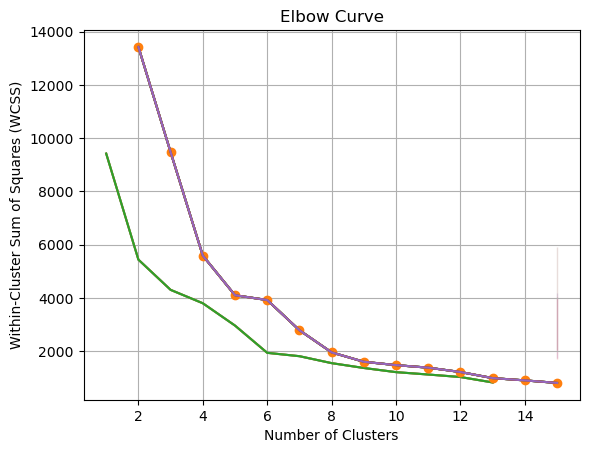

In [72]:

# Extracting values for x (number of clusters) and y (WCSS)
x = optimal_k['k']
y = optimal_k['WCSS']

# Plotting the elbow curve using Matplotlib
plt.plot(x, y)
# Displaying the plot inline
%matplotlib inline
plt.show()

In [48]:
KM = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=42)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 4, 0])

In [49]:
scaled_data['Clusters'] = KM.labels_
scaled_data.head()

,Recency,Frequency,Monetary,Clusters
0,-0.886877,0.383014,0.375097,0
1,-0.161877,-0.284474,0.032622,0
2,-0.737904,-0.089428,-0.061808,0
3,2.162093,-0.332151,-0.219173,1
4,-0.559137,-0.037416,-0.090784,0


In [50]:
scaled_data['Clusters'].value_counts()

Clusters
0    2602
5     791
1     626
4     315
3      11
2       4
Name: count, dtype: int64

In [51]:
unsupervised_data['Clusters'] = KM.labels_
unsupervised_data.head()

,Recency,Frequency,Monetary,Clusters
0,4,181,550416.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,1
4,37,84,151822.0,0


In [52]:
# Exporting this entire data as a csv file named "outputkmeans.csv"

output_kmeans = "outputkmeans.csv"
scaled_data.to_csv(output_kmeans,index=False)

# Setting index=False to avoid exporting the DataFrame index as a column


#  to_csv() to export the DataFrame to a CSV file
